# Data Science in VS Code tutorial

Let's walk through the complete [Data Science in VS Code tutorial](https://code.visualstudio.com/docs/datascience/data-science-tutorial) using this Jupyter Notebook to copy over the code, run it, and capture our observations for each step in markdown cells. Along the way, explore how we can take advantage of the Data Science Profile we setup (with the Data Wrangler extension) to make our data science workflow more efficient.

For convenience, the dataset used for this tutorial (`titanic3.csv`) has already been downloaded to the repo under the `1-data/` folder. All you need to do is load it update the code to reference the right location.

---

## 1. Set up a data science environment

The [instructions](https://code.visualstudio.com/docs/datascience/data-science-tutorial#_set-up-a-data-science-environment) require you to setup the required environment manually. However, _this_ dev container is already configured with all the packages and libraries you need (under `requirements.txt`), specifically the following:
 - pandas
 - jupyter 
 - seaborn
 - scikit-learn
 - keras
 - tensorflow
Note that if you want to add any additional libraries (for your own exploration), make sure you update the `requirements.txt` file, save it, and rebuild the dev container to have them take effect.

Once you open this notebook in your dev container (GitHub Codespaces or Docker Desktop) runtime, you should:
 - `Select Kernel` (top right) - gets a drop down of options
 - Select `Python Envionments` - gets you a list of available options
 - Select `Python 3.10.13` - or whatever shows as the recommended one in the list
 - Check that the `Select Kernel` box is now updated to show this runtime.

You are now ready to run the code in this notebook.

---

## 2. Prepare the data

The [instructions](https://code.visualstudio.com/docs/datascience/data-science-tutorial#_prepare-the-data) start by loading the data from a downloaded CSV file. Let's modify that to use the location in this repo - and run just the first cell. This also validates that our Jupyter Notebook environment is working correctly.

Since our dev container configuration contains the [Data Wrangler Extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler), you'll notice that running the cell below gives you a **Open df** prompt below the `df.head()` code statement in the output. This is a feature of the Data Wrangler extension that allows you to view the data in a tabular format, and perform some basic data wrangling operations on it.

In [1]:
# 2.1 | Load the Data into a Pandas Dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('./../1-data/titanic3.csv')

# 2.2 | Have Pandas Show the First Few Rows of the Data
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


---

## 3. Wrangle the data

To get started wrangling the data, you have two options:
1. [Use the **Variables** menu option](https://code.visualstudio.com/docs/datascience/data-science-tutorial#_prepare-the-data)in Visual Studio Code to open a pane that shows the data variables in your notebook runtime. You should see `df` (data frame) with a data viewer icon to the left ("Show variable snapshot in data viewer"). Click that to launch the data view.
2. Open the Data Wrangler view by clicking the **Open df** button in the code cell directly. This should launch the data viewer in the same way as the first option.

Either way, you get a Data Viewer pane that you can open in **Editing Mode** to explore  [Data Wrangler operations](https://code.visualstudio.com/docs/datascience/data-wrangler#_data-wrangler-operations) like: 
- Sorting the data
- Filtering the data based on a condition
- Dropping, selecting, renaming, cloning, or creating - data columns
- Finding and replacing values, or filling in missing values
- String manipulation (e.g., splitting, capitalizing, transforming, etc.)

Every operation will effectively write _code_ in the window below the data viewer, which you can then copy over to your notebook (with a click) or to your application script (via clipboard). You can also choose to [export the changed data](https://code.visualstudio.com/docs/datascience/data-wrangler#_edit-and-export-code) to a new data file (CSV) in your workspace. Note that all operations are simply working on a _copy_ of the data in the viewer, to showcase code required, so your input datafile remains unchanged.

**For Example:**
In the code below, I used Data Wrangler to filter the columns for _female_ passengers only, sort the results _by descending age_ and group it by _survived_ status. Then asked it to export the code for changes back to the Jupyter Notebook to get the code below. I can then comment out specific lines (e.g., groupby) and run the code, to see the output visualized as required. **Note that my original datafile remains unchanged**.

In [2]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Filter rows based on column: 'sex'
    df = df[df['sex'] == "female"]
    
    # Sort by column: 'age' (descending)
    df = df.sort_values(['age'], ascending=[False])
    # Grouped on column: 'survived'
    # df = df.groupby(['survived']).count().reset_index()[['survived']]
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
78,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,14,NaN,"Lakewood, NJ"
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S,7,NaN,"Milwaukee, WI"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
286,1,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S,NaN,NaN,"New York, NY"


---

## 4. Visualize the Data

Let's go back to the original dataset for now (or you can use the data frame from the wrangled set if you choose) and follow the [Visual Studio Code Tutorial](https://code.visualstudio.com/docs/datascience/data-science-tutorial#_prepare-the-data) **from step 9** to get a sense for how the different data attributes (columns) related to survival status. Note that our tutorial uses the variable `df` to reference the data frame (vs. `data` in the tutorial).

Once you run the code, the output visualization pane will give you options to save the images to a file, copy to clipboard, or expand them for a full-screen view.

<Axes: xlabel='survived', ylabel='fare'>

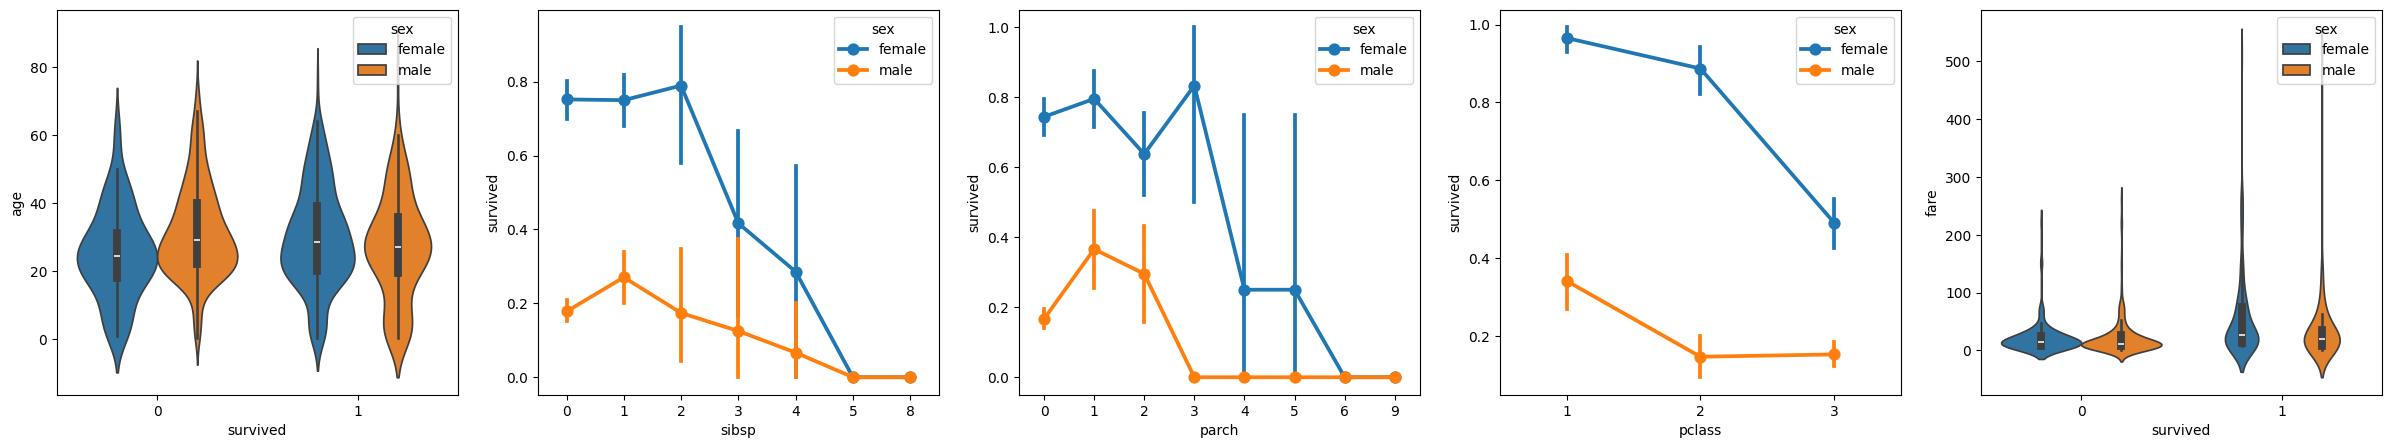

In [3]:
# Reload the original data
df = pd.read_csv('./../1-data/titanic3.csv')

## (Step 9) Make data corrections for missing values and data types
df.replace('?', np.nan, inplace= True)
df = df.astype({"age": np.float64, "fare": np.float64})

# (Step 10) Use the seaborn and matplot libraries to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=df, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=df, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=df, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=df, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=df, ax=axs[4])

---

## 5. Explore Correlation with Pandas

Let's continue with steps 11 and 12 of the [Visual Studio Code Tutorial](https://code.visualstudio.com/docs/datascience/data-science-tutorial#_prepare-the-data) to complete our data analysis journey.

Correlation requires us to have numerical data - but the `sex` column is categorical. So we need to convert it to a numerical value. We can use string manipulation directly (replace male and female strings with values) then analyze the correlation using the `corr()` method as shown below.

In [4]:
# (Step 11) Map string variables to numbers for the gender attribute
df.replace({'male': 1, 'female': 0}, inplace=True)

## Now analyze correlation between all passenger attributes and their surival status
df.corr(numeric_only=True).abs()[["survived"]]

/tmp/ipykernel_3587/1421770689.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male': 1, 'female': 0}, inplace=True)


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


Let's keep going with [step 13](https://code.visualstudio.com/docs/datascience/data-science-tutorial#_prepare-the-data) - the above correlation indicates sex (gender) correlated closely with the changes of survival - but attributes like sibsp (siblings or spouse) and parch (parents or children) were not. Say we want to validate the hypothesis that _"having a relative on board increased chances of survival"_ - we can create a new variable that holds a relevant value and then analyze the correlation again.

In [5]:
# Create a new column that has a boolean (yes/no) value for whether the passenger had any relatives on board
# computed based on whether they had siblings, spouses, parents, or children on board.
df['relatives'] = df.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
df.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


This shows us that survivabilty has a higher correlation to the "existence of any relative" rather than to the specific number or type of relative. So, to train a model, we can remove less-correlated columns and just keep the ones that have the higher correlation - and we can remove any rows that had **NaN** values in them - to get out final training set.

In [6]:
# (Step 12) Remove all rows with missing values, and drop less correlated columns
df = df[['sex', 'pclass','age','relatives','fare','survived']].dropna()

# We are now ready for training.

---


# Train and evaluate a model

Try exploring [this section of the tutorial](https://code.visualstudio.com/docs/datascience/data-science-tutorial#_train-and-evaluate-a-model) on your own by adding the code cells one at a time, and documenting your experiences with markdown cells. We will revisit this section later on when we explore tools like GitHub Copilot and Responsible AI. For now, this section will help you explore the first steps in machine learning with Python.